In [33]:
from math import *
from matplotlib import pyplot as plt

class diff_eqn():
    def __init__(self):
        self.approx = []
        self.t = []
        # self.rel_error=[]

    def f(self, x, y): 
        '''Implemented in child class'''
        raise NotImplementedError("Implemented in child class")

    # def exact_value(self, x): 
    #     return ((x+5)/4 + 3/4*exp(0.2*x))**2

    def display_value(self, N):
        for i in range(N+1):
            print("{: 2.4f} {: 2.4f}".format(self.t[i], self.approx[i]))
            
    def plot(self, a, b, N, alpha):
        plt.title("approximated value")
        plt.plot(self.t, self.approx, label='approximated solution to the initial-value problem')
        plt.legend()
        plt.show()
            
    def euler_method(self, a, b, N, alpha, value_print=False, plot=False):
        # initial condition: y(a) = alpha
        h=(b-a)/N
        self.approx = [alpha, ]
        self.t = [a+h*i for i in range(N+1)]
        #self.rel_error.append(0)
        for i in range(N): 
            self.approx.append(self.approx[i] + h*self.f(self.t[i], self.approx[i]))
            # self.rel_error.append(abs(self.approx[i]-self.exact_value(a + h*i))/self.exact_value(a + h*i))
        if value_print:
            self.display_value(N)
            print()
        if plot:
            self.plot(a, b, N, alpha)

    def midpoint_method(self, a, b, N, alpha, value_print=False, plot=False):
        # initial condition: y(a) = alpha
        h=(b-a)/N
        self.approx = [alpha, ]
        self.t = [a+h*i for i in range(N+1)]
        #self.rel_error.append(0)
        for i in range(N):
            K1 = h*self.f(self.t[i], self.approx[i])
            K2 = h*self.f(self.t[i] + h/2, self.approx[i] + K1/2)
            K3 = h*self.f(self.t[i] + h/2, self.approx[i] + K2/2)
            K4 = h*self.f(self.t[i] + h, self.approx[i] + K3)
            self.approx.append(self.approx[i] + (K1 + 2*K2 + 2*K3 + K4)/6)
            # self.rel_error.append(abs(self.approx[i]-self.exact_value(a + h*i))/self.exact_value(a + h*i))
        if value_print:
            self.display_value(N)
            print()
        if plot:
            self.plot(a, b, N, alpha)

    def RK2_method(self, a, b, N, alpha, value_print=False, plot=False):
        self.midpoint_method(a, b, N, alpha, value_print, plot)

    def RK4_method(self, a, b, N, alpha, value_print=False, plot=False):
        # initial condition: y(a) = alpha
        h=(b-a)/N
        self.approx = [alpha, ]
        self.t = [a+h*i for i in range(N+1)]
        #self.rel_error.append(0)
        for i in range(N):
            K1 = h*self.f(self.t[i], self.approx[i])
            K2 = h*self.f(self.t[i] + h/2, self.approx[i] + K1/2)
            K3 = h*self.f(self.t[i] + h/2, self.approx[i] + K2/2)
            K4 = h*self.f(self.t[i] + h, self.approx[i] + K3)
            self.approx.append(self.approx[i] + (K1 + 2*K2 + 2*K3 + K4)/6)
            # self.rel_error.append(abs(self.approx[i]-self.exact_value(a + h*i))/self.exact_value(a + h*i))
        if value_print:
            self.display_value(N)
            print()
        if plot:
            self.plot(a, b, N, alpha)


 0.0000  4.0000
 0.2000  4.3289
 0.4000  4.6763
 0.6000  5.0428
 0.8000  5.4295
 1.0000  5.8373
 1.2000  6.2672
 1.4000  6.7203
 1.6000  7.1977
 1.8000  7.7006
 2.0000  8.2304
 2.2000  8.7884
 2.4000  9.3762
 2.6000  9.9952
 2.8000  10.6472
 3.0000  11.3339
 3.2000  12.0573
 3.4000  12.8193
 3.6000  13.6222
 3.8000  14.4682
 4.0000  15.3598
 4.2000  16.2996
 4.4000  17.2904
 4.6000  18.3352
 4.8000  19.4373
 5.0000  20.5999
 5.2000  21.8268
 5.4000  23.1218
 5.6000  24.4890
 5.8000  25.9330
 6.0000  27.4585
 6.2000  29.0705
 6.4000  30.7745
 6.6000  32.5763
 6.8000  34.4821
 7.0000  36.4985
 7.2000  38.6327
 7.4000  40.8923
 7.6000  43.2854
 7.8000  45.8209
 8.0000  48.5081
 8.2000  51.3569
 8.4000  54.3783
 8.6000  57.5837
 8.8000  60.9856
 9.0000  64.5971
 9.2000  68.4326
 9.4000  72.5074
 9.6000  76.8378
 9.8000  81.4415
 10.0000  86.3373



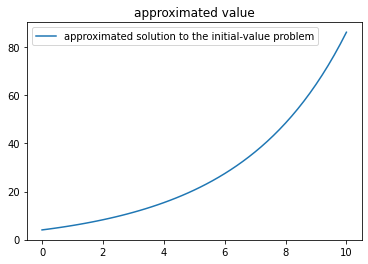

In [32]:
from math import *

class mySDE(diff_eqn):
    def __init__(self):
        super().__init__()

    def f(self, x, y):
        '''Overriding function'''
        return 0.4*y - 0.1*x*sqrt(y)

    def solve(self, a, b, N, alpha, value_print=False, plot=False):
        super().RK4_method(a, b, N, alpha, value_print, plot)

SolDE = mySDE()
SolDE.solve(a=0, b=10, N=50, alpha=4, value_print=True, plot=True)